In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'figure.figsize': (10, 6)})
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'axes.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
matplotlib.rcParams.update({'font.family': 'Helvetica, Arial, sans-serif'})

%config InlineBackend.figure_format = 'retina'

In [2]:

m = pd.read_csv('movie_metadata.csv')
m = m[[
    'movie_title',
    'title_year',
    
    'genres',
    'plot_keywords',
    'duration',
    
    'budget',
    'gross',
    
    'language',
    'country',
    'content_rating',
    
    'color',
    'aspect_ratio',
    
    'facenumber_in_poster',
    
    'director_name',
    
    'actor_1_name',
    'actor_2_name',
    'actor_3_name',
    
    'movie_facebook_likes',
    'director_facebook_likes',
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'cast_total_facebook_likes',
    
    'movie_imdb_link',
    'num_user_for_reviews',
    'num_critic_for_reviews',
    'num_voted_users',
    'imdb_score',
]]
m.info()
m_original=m.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
movie_title                  5043 non-null object
title_year                   4935 non-null float64
genres                       5043 non-null object
plot_keywords                4890 non-null object
duration                     5028 non-null float64
budget                       4551 non-null float64
gross                        4159 non-null float64
language                     5031 non-null object
country                      5038 non-null object
content_rating               4740 non-null object
color                        5024 non-null object
aspect_ratio                 4714 non-null float64
facenumber_in_poster         5030 non-null float64
director_name                4939 non-null object
actor_1_name                 5036 non-null object
actor_2_name                 5030 non-null object
actor_3_name                 5020 non-null object
movie_facebook_likes         5043 non

In [3]:
m.head()

,movie_title,title_year,genres,plot_keywords,duration,budget,gross,language,country,content_rating,...,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_imdb_link,num_user_for_reviews,num_critic_for_reviews,num_voted_users,imdb_score
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,178.0,237000000.0,760505847.0,English,USA,PG-13,...,0.0,1000.0,936.0,855.0,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,723.0,886204,7.9
1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,169.0,300000000.0,309404152.0,English,USA,PG-13,...,563.0,40000.0,5000.0,1000.0,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,302.0,471220,7.1
2,Spectre,2015.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,148.0,245000000.0,200074175.0,English,UK,PG-13,...,0.0,11000.0,393.0,161.0,11700,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,602.0,275868,6.8
3,The Dark Knight Rises,2012.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,164.0,250000000.0,448130642.0,English,USA,PG-13,...,22000.0,27000.0,23000.0,23000.0,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,813.0,1144337,8.5
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,131.0,131.0,12.0,NaN,143,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,8,7.1


In [4]:
m[m['budget'] > 1e9]
# some films have crazy budgets: turns out currency is not normalized (Princess Mononoke, 2.4 billion Yen for example)

,movie_title,title_year,genres,plot_keywords,duration,budget,gross,language,country,content_rating,...,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_imdb_link,num_user_for_reviews,num_critic_for_reviews,num_voted_users,imdb_score
2323,Princess Mononoke,1997.0,Adventure|Animation|Fantasy,anime|cult film|forest|princess|studio ghibli,134.0,2.400000e+09,2298191.0,Japanese,Japan,PG-13,...,6000.0,893.0,851.0,745.0,2710,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,174.0,221552,8.4
2334,Steamboy,2004.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,19th century|ball|boy|inventor|steam,103.0,2.127520e+09,410388.0,Japanese,Japan,PG-13,...,78.0,488.0,336.0,101.0,991,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,105.0,13727,6.9
2988,The Host,2006.0,Comedy|Drama|Horror|Sci-Fi,daughter|han river|monster|river|seoul,110.0,1.221550e+10,2201412.0,Korean,South Korea,R,...,584.0,629.0,398.0,74.0,1173,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,363.0,68883,7.0
3005,Fateless,2005.0,Drama|Romance|War,bus|death|gay slur|hatred|jewish,134.0,2.500000e+09,195888.0,Hungarian,Hungary,R,...,45.0,9.0,2.0,0.0,11,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,73.0,5603,7.1
3423,Akira,1988.0,Action|Animation|Sci-Fi,based on manga|biker gang|gifted child|post th...,124.0,1.100000e+09,439162.0,Japanese,Japan,R,...,78.0,6.0,5.0,4.0,28,http://www.imdb.com/title/tt0094625/?ref_=fn_t...,430.0,150.0,106160,8.1
3859,Lady Vengeance,2005.0,Crime|Drama,cake|christian|lesbian sex|oral sex|pregnant s...,112.0,4.200000e+09,211667.0,Korean,South Korea,R,...,0.0,717.0,126.0,38.0,907,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,202.0,53508,7.7


In [5]:
print('Before:',m['movie_title'].count())
m = m[m['country'] == 'USA']
# therefore no foreign films!
print('After:',m['movie_title'].count())

Before: 5043
After: 3807


In [6]:
#m.drop('movie_title', axis=1, inplace=True)

In [7]:
m.drop('plot_keywords', axis=1, inplace=True)
m.drop('actor_1_name', axis=1, inplace=True)
m.drop('actor_2_name', axis=1, inplace=True)
m.drop('actor_3_name', axis=1, inplace=True)
#m.drop('movie_imdb_link', axis=1, inplace=True)
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 5042
Data columns (total 24 columns):
movie_title                  3807 non-null object
title_year                   3733 non-null float64
genres                       3807 non-null object
duration                     3801 non-null float64
budget                       3509 non-null float64
gross                        3235 non-null float64
language                     3797 non-null object
country                      3807 non-null object
content_rating               3649 non-null object
color                        3793 non-null object
aspect_ratio                 3585 non-null float64
facenumber_in_poster         3795 non-null float64
director_name                3733 non-null object
movie_facebook_likes         3807 non-null int64
director_facebook_likes      3733 non-null float64
actor_1_facebook_likes       3803 non-null float64
actor_2_facebook_likes       3800 non-null float64
actor_3_facebook_likes       3794 n

In [8]:
print('All Genres')
genres=set(m['genres'].str.split('|').sum())
print(genres)

All Genres
{'Horror', 'Music', 'Comedy', 'Thriller', 'Western', 'News', 'Adventure', 'Family', 'Reality-TV', 'Musical', 'Animation', 'Drama', 'History', 'Film-Noir', 'War', 'Game-Show', 'Romance', 'Documentary', 'Sport', 'Fantasy', 'Short', 'Mystery', 'Sci-Fi', 'Biography', 'Action', 'Crime'}


In [9]:
#for genre in genres:
#    m[genre] = False
#m['genre_lists']=m['genres'].str.split('|')
#for index,genre_list in enumerate(m['genre_lists']):
#    for genre in genre_list:
#        m.set_value(genre,index,True)
#print(m)

In [10]:
m['color'].value_counts(dropna=False)

Color               3644
 Black and White     149
NaN                   14
Name: color, dtype: int64

In [11]:
for col in ['language','country','content_rating','color','aspect_ratio']:
    m[col] = m[col].astype('category')
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 5042
Data columns (total 24 columns):
movie_title                  3807 non-null object
title_year                   3733 non-null float64
genres                       3807 non-null object
duration                     3801 non-null float64
budget                       3509 non-null float64
gross                        3235 non-null float64
language                     3797 non-null category
country                      3807 non-null category
content_rating               3649 non-null category
color                        3793 non-null category
aspect_ratio                 3585 non-null category
facenumber_in_poster         3795 non-null float64
director_name                3733 non-null object
movie_facebook_likes         3807 non-null int64
director_facebook_likes      3733 non-null float64
actor_1_facebook_likes       3803 non-null float64
actor_2_facebook_likes       3800 non-null float64
actor_3_facebook_likes    

In [12]:
m.head()

,movie_title,title_year,genres,duration,budget,gross,language,country,content_rating,color,...,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_imdb_link,num_user_for_reviews,num_critic_for_reviews,num_voted_users,imdb_score
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,178.0,237000000.0,760505847.0,English,USA,PG-13,Color,...,0.0,1000.0,936.0,855.0,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,723.0,886204,7.9
1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,169.0,300000000.0,309404152.0,English,USA,PG-13,Color,...,563.0,40000.0,5000.0,1000.0,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,302.0,471220,7.1
3,The Dark Knight Rises,2012.0,Action|Thriller,164.0,250000000.0,448130642.0,English,USA,PG-13,Color,...,22000.0,27000.0,23000.0,23000.0,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,813.0,1144337,8.5
5,John Carter,2012.0,Action|Adventure|Sci-Fi,132.0,263700000.0,73058679.0,English,USA,PG-13,Color,...,475.0,640.0,632.0,530.0,1873,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,462.0,212204,6.6
6,Spider-Man 3,2007.0,Action|Adventure|Romance,156.0,258000000.0,336530303.0,English,USA,PG-13,Color,...,0.0,24000.0,11000.0,4000.0,46055,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,392.0,383056,6.2


In [13]:
# [CITE] https://codedump.io/share/w8TDdH1LYgGt/1/format-certain-floating-dataframe-columns-into-percentage-in-pandas
nullPercents = m.isnull().sum()/m.count()
nullPercents.sort_values(inplace=True,ascending=False)
nullPercents = pd.Series([str(round(val*100, 2))+"%" for val in nullPercents], index = nullPercents.index)
nullPercents

gross                        17.68%
budget                        8.49%
aspect_ratio                  6.19%
content_rating                4.33%
director_name                 1.98%
title_year                    1.98%
director_facebook_likes       1.98%
num_critic_for_reviews        1.04%
color                         0.37%
num_user_for_reviews          0.34%
actor_3_facebook_likes        0.34%
facenumber_in_poster          0.32%
language                      0.26%
actor_2_facebook_likes        0.18%
duration                      0.16%
actor_1_facebook_likes        0.11%
genres                         0.0%
imdb_score                     0.0%
country                        0.0%
num_voted_users                0.0%
movie_facebook_likes           0.0%
cast_total_facebook_likes      0.0%
movie_imdb_link                0.0%
movie_title                    0.0%
dtype: object

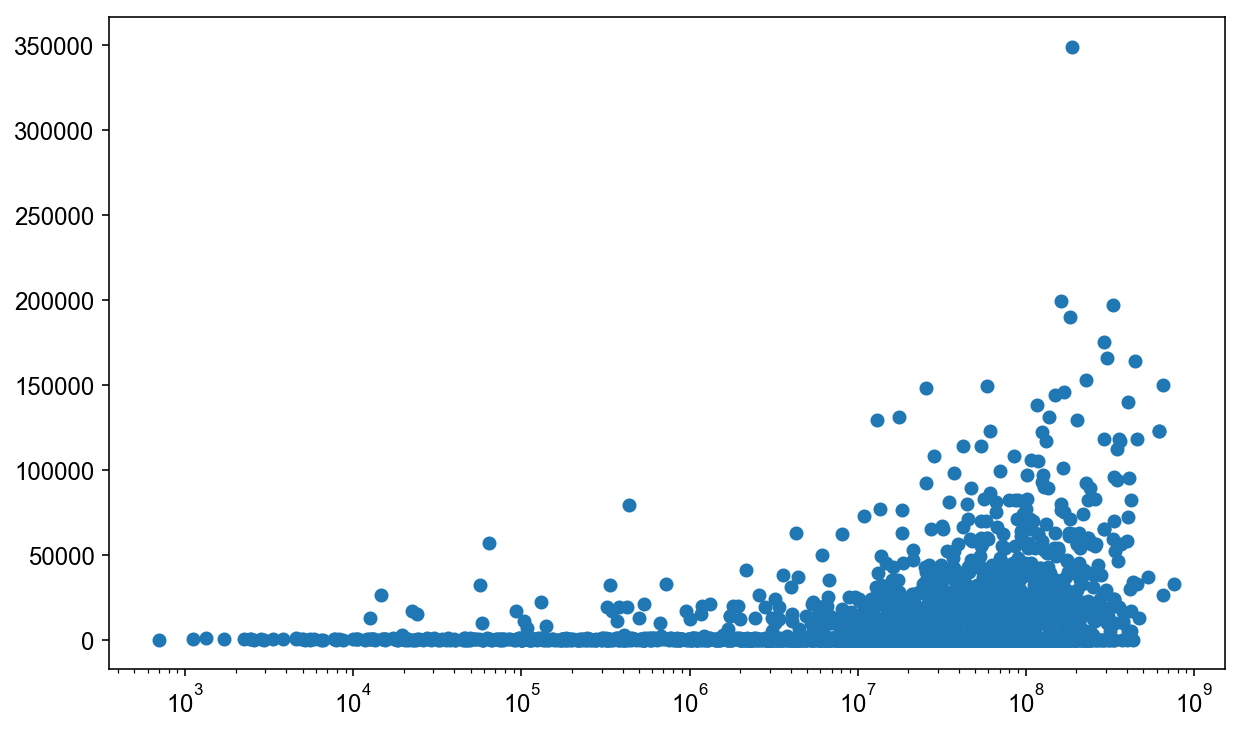

In [14]:
plt.scatter(m['gross'],m['movie_facebook_likes'])
plt.xscale('log')
plt.show()

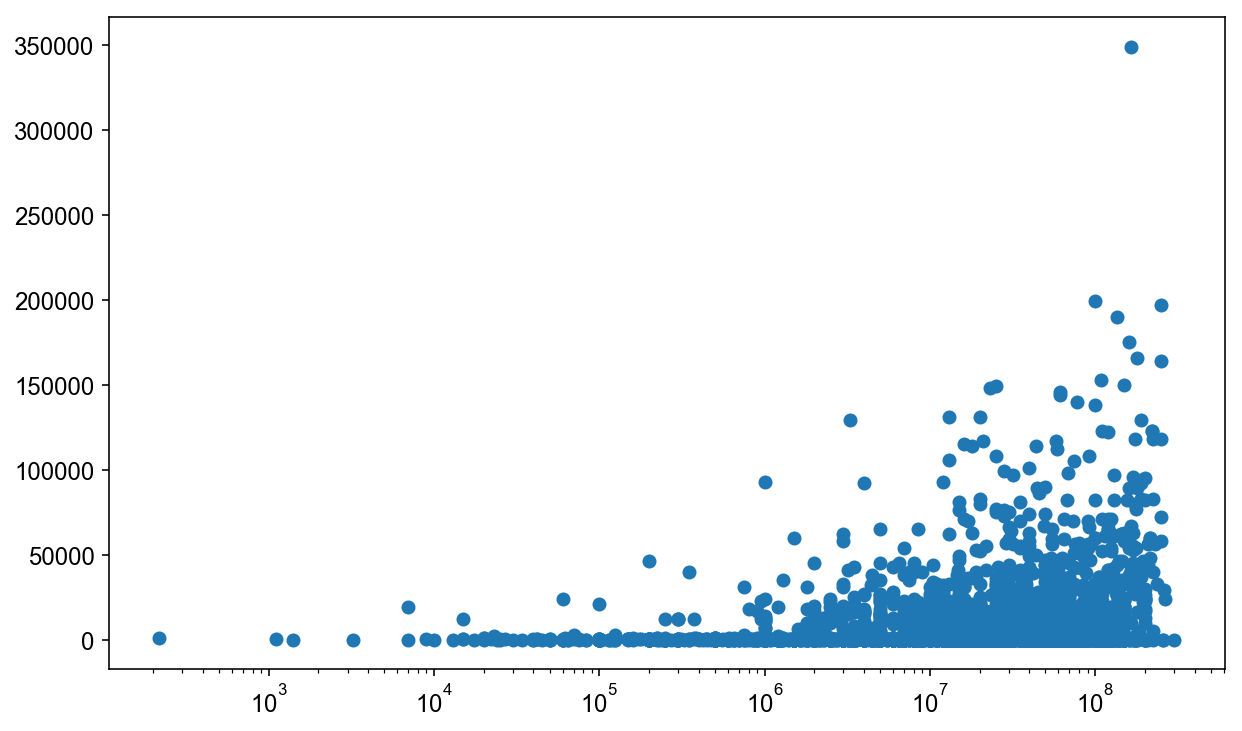

In [15]:
plt.scatter(m['budget'],m['movie_facebook_likes'])
plt.xscale('log')
plt.show()

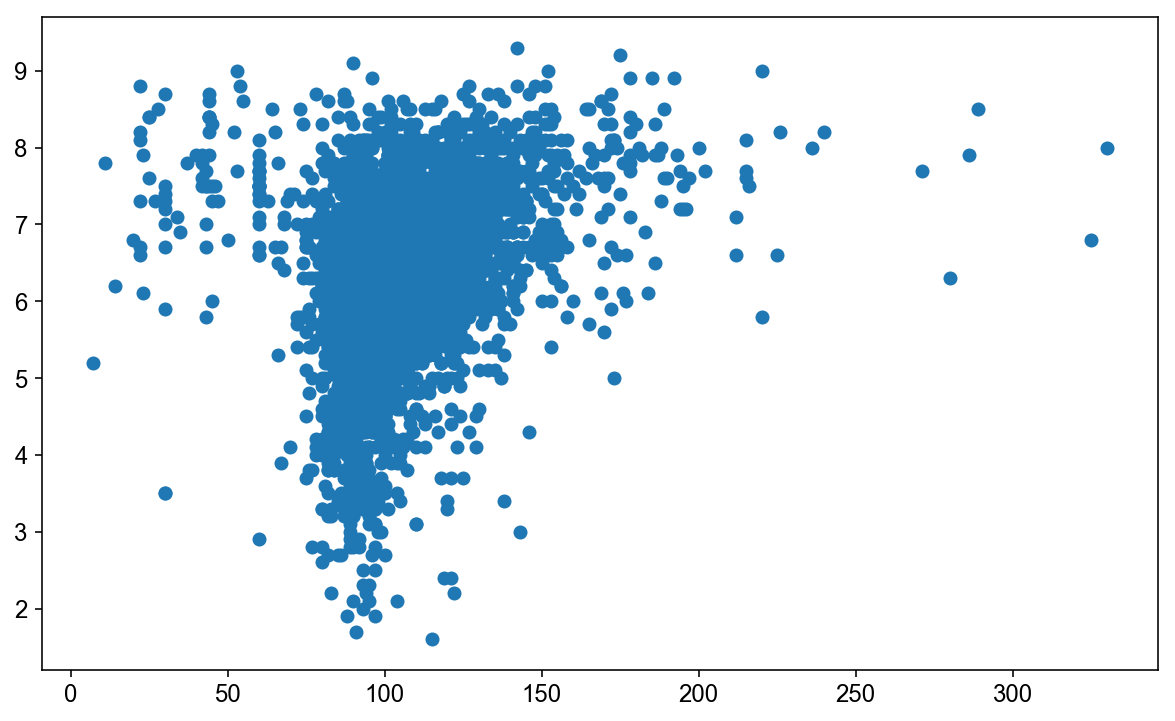

In [16]:
plt.scatter(m['duration'],m['imdb_score'])
# plt.xscale('log')
plt.show()

In [17]:
# Anything without a year should be removed
m = m[pd.notnull(m['title_year'])]
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3733 entries, 0 to 5042
Data columns (total 24 columns):
movie_title                  3733 non-null object
title_year                   3733 non-null float64
genres                       3733 non-null object
duration                     3727 non-null float64
budget                       3503 non-null float64
gross                        3235 non-null float64
language                     3724 non-null category
country                      3733 non-null category
content_rating               3599 non-null category
color                        3721 non-null category
aspect_ratio                 3519 non-null category
facenumber_in_poster         3721 non-null float64
director_name                3733 non-null object
movie_facebook_likes         3733 non-null int64
director_facebook_likes      3733 non-null float64
actor_1_facebook_likes       3729 non-null float64
actor_2_facebook_likes       3727 non-null float64
actor_3_facebook_likes    

In [18]:
(m['num_critic_for_reviews'] == 1.0).sum()

28

In [19]:
for col in ['title_year','facenumber_in_poster','movie_facebook_likes',
'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes',
'cast_total_facebook_likes','num_user_for_reviews','num_critic_for_reviews',
'num_voted_users']:
    m[col] = pd.to_numeric(m[col],downcast='integer')

In [20]:
m['director_facebook_likes'].max()

23000.0

In [21]:
# Anything without full facebook like info should be removed:
# can't be imputed
for col in ['movie_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes',
'actor_3_facebook_likes','cast_total_facebook_likes']:
    m = m[pd.notnull(m[col])]
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3722 entries, 0 to 5042
Data columns (total 24 columns):
movie_title                  3722 non-null object
title_year                   3722 non-null int16
genres                       3722 non-null object
duration                     3717 non-null float64
budget                       3494 non-null float64
gross                        3228 non-null float64
language                     3713 non-null category
country                      3722 non-null category
content_rating               3593 non-null category
color                        3710 non-null category
aspect_ratio                 3510 non-null category
facenumber_in_poster         3710 non-null float64
director_name                3722 non-null object
movie_facebook_likes         3722 non-null int32
director_facebook_likes      3722 non-null float64
actor_1_facebook_likes       3722 non-null float64
actor_2_facebook_likes       3722 non-null float64
actor_3_facebook_likes      

In [22]:
# fill in missing critics/users' review counts with 0
# (must rationalize this)
for col in ['num_user_for_reviews','num_critic_for_reviews']:
    m[col].fillna(value=0,inplace=True)

In [23]:
# remove entries with missing content rating or color

In [24]:
# We cannot impute these, remove them
for col in ['language','country','content_rating','aspect_ratio','duration','gross','budget']:
    m = m[pd.notnull(m[col])]
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 5042
Data columns (total 24 columns):
movie_title                  3002 non-null object
title_year                   3002 non-null int16
genres                       3002 non-null object
duration                     3002 non-null float64
budget                       3002 non-null float64
gross                        3002 non-null float64
language                     3002 non-null category
country                      3002 non-null category
content_rating               3002 non-null category
color                        3001 non-null category
aspect_ratio                 3002 non-null category
facenumber_in_poster         2996 non-null float64
director_name                3002 non-null object
movie_facebook_likes         3002 non-null int32
director_facebook_likes      3002 non-null float64
actor_1_facebook_likes       3002 non-null float64
actor_2_facebook_likes       3002 non-null float64
actor_3_facebook_likes      

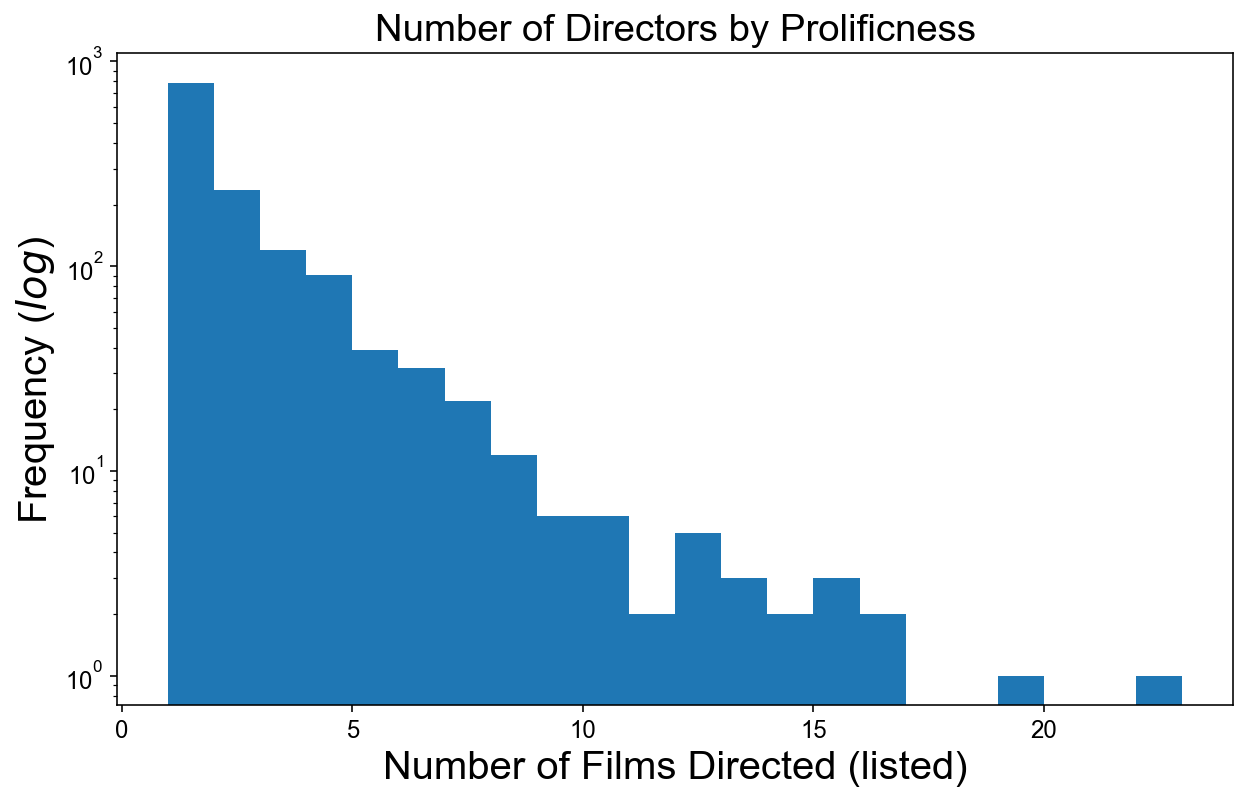

In [25]:
# DATA VISUALIZATION
# Number of directors who direct a certain number of movies on the list
# "How prolific are the directors?"
dc=m['director_name'].value_counts().value_counts().index
dr=abs(dc.max()-dc.min())

plt.hist(m['director_name'].value_counts(),bins=dr)
plt.yscale('log')
plt.title('Number of Directors by Prolificness')
plt.xlabel('Number of Films Directed (listed)')
plt.ylabel('Frequency ($log$)')
plt.show()

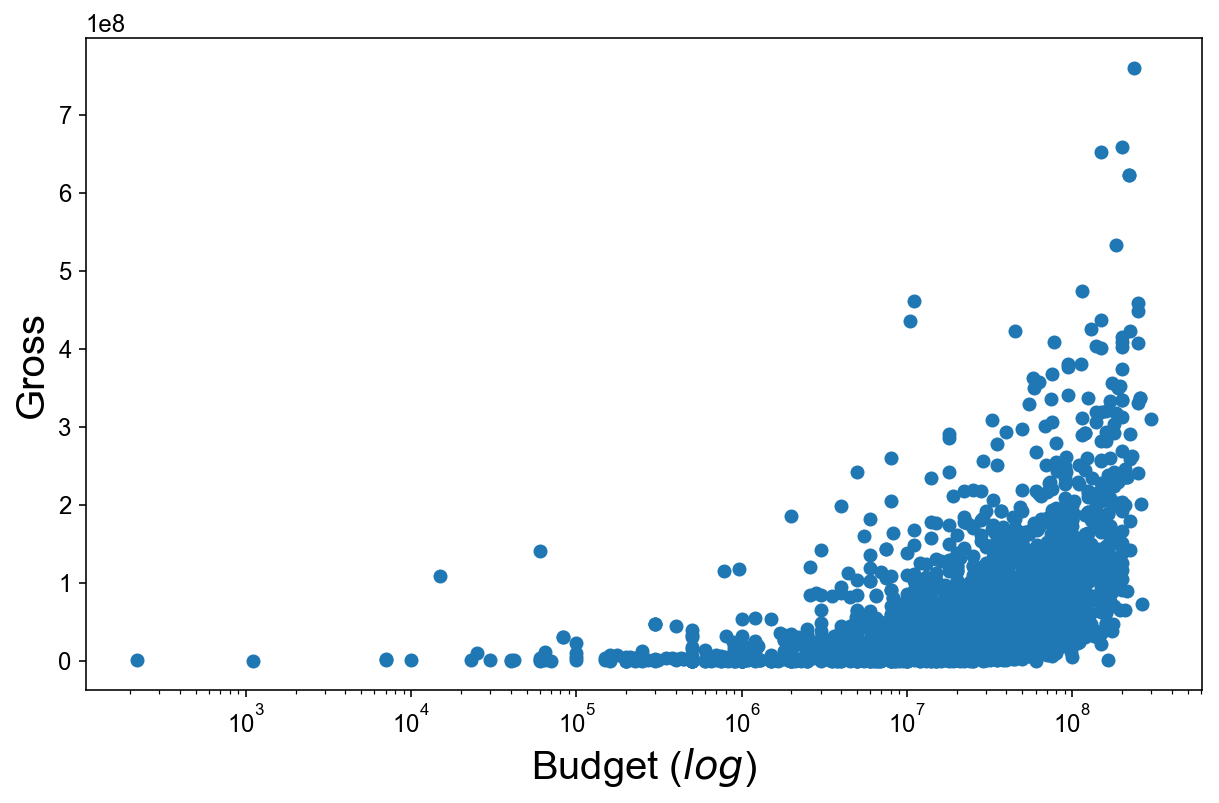

In [26]:
plt.scatter(m['budget'],m['gross'])
plt.xlabel('Budget ($log$)')
plt.ylabel('Gross')
plt.xscale('log')
plt.show()

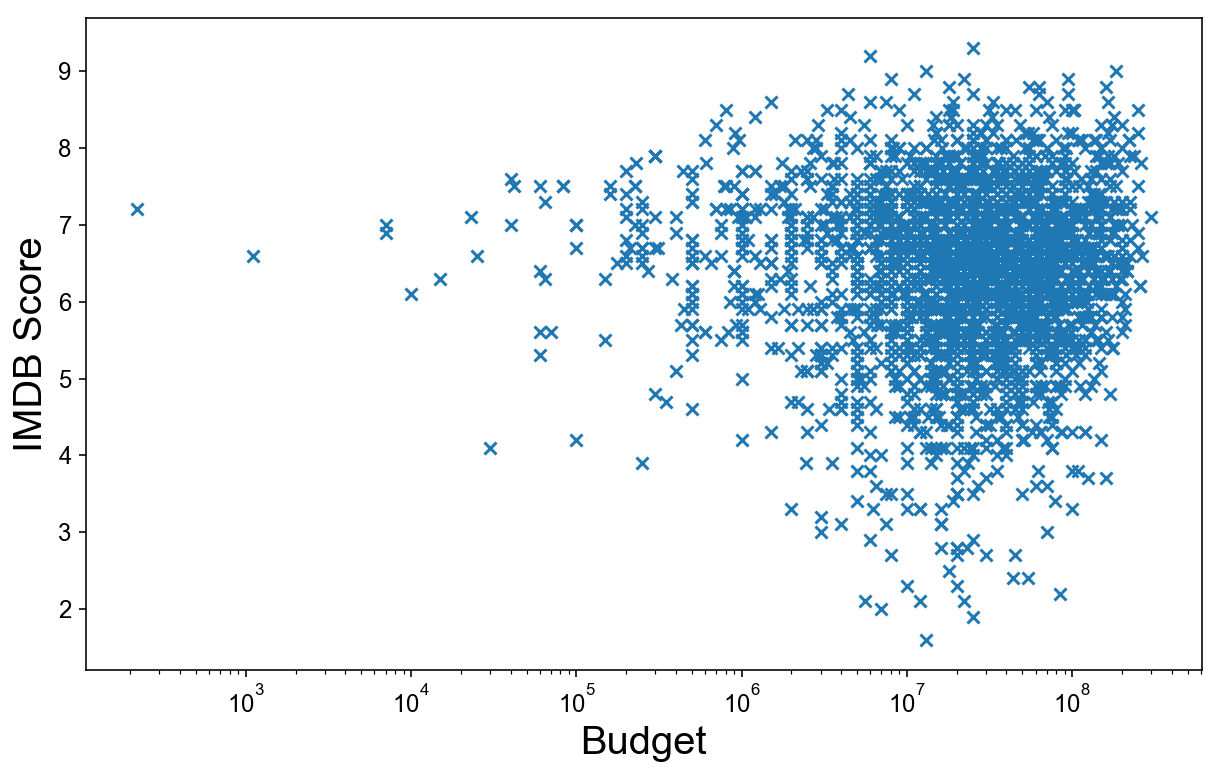

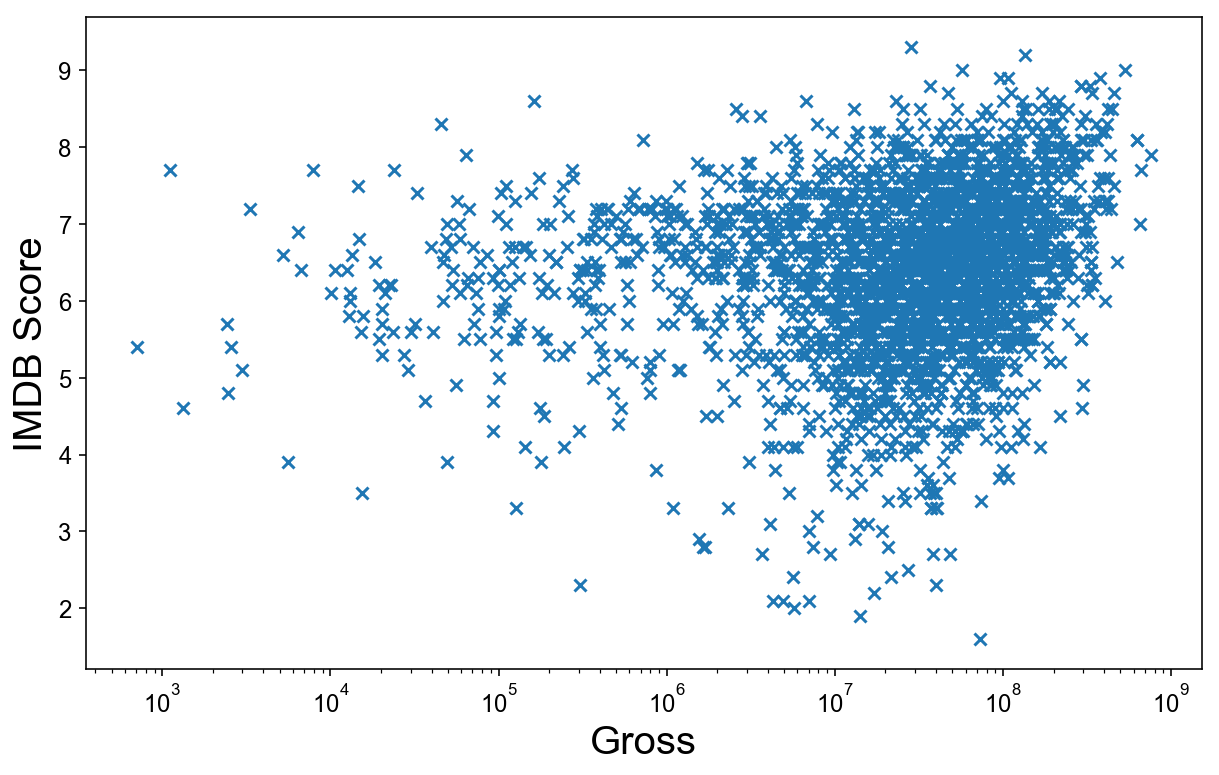

In [27]:
plt.scatter(m['budget'],m['imdb_score'],marker='x')
plt.xlabel('Budget')
plt.ylabel('IMDB Score')
plt.xscale('log')
plt.show()

plt.scatter(m['gross'],m['imdb_score'],marker='x')
plt.xlabel('Gross')
plt.ylabel('IMDB Score')
plt.xscale('log')
plt.show()

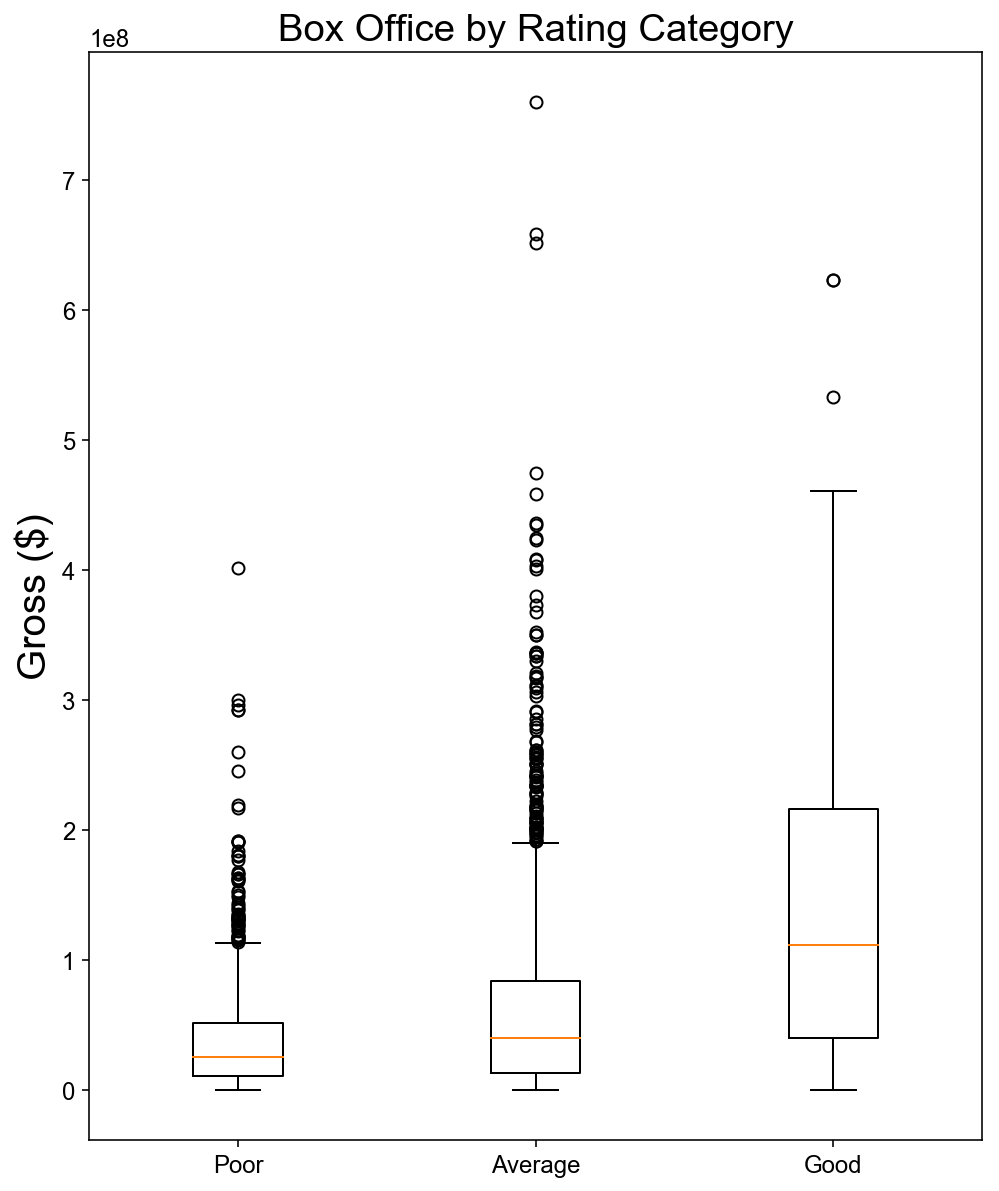

In [28]:
m['rating_category'] = pd.cut(m.imdb_score,[0,6,8,10],labels=['poor','average','good'])
m_grouped_score = m.groupby(by=['rating_category'])

poor = m[m['rating_category'] == 'poor']
average = m[m['rating_category'] == 'average']
good = m[m['rating_category'] == 'good']

p = poor['gross'].tolist()
a = average['gross'].tolist()
g = good['gross'].tolist()

dataset = [p,a,g]

plt.figure(figsize=(8,10))
plt.boxplot(dataset, labels=['Poor','Average','Good'])
plt.title('Box Office by Rating Category')
plt.ylabel('Gross ($)')
plt.show()

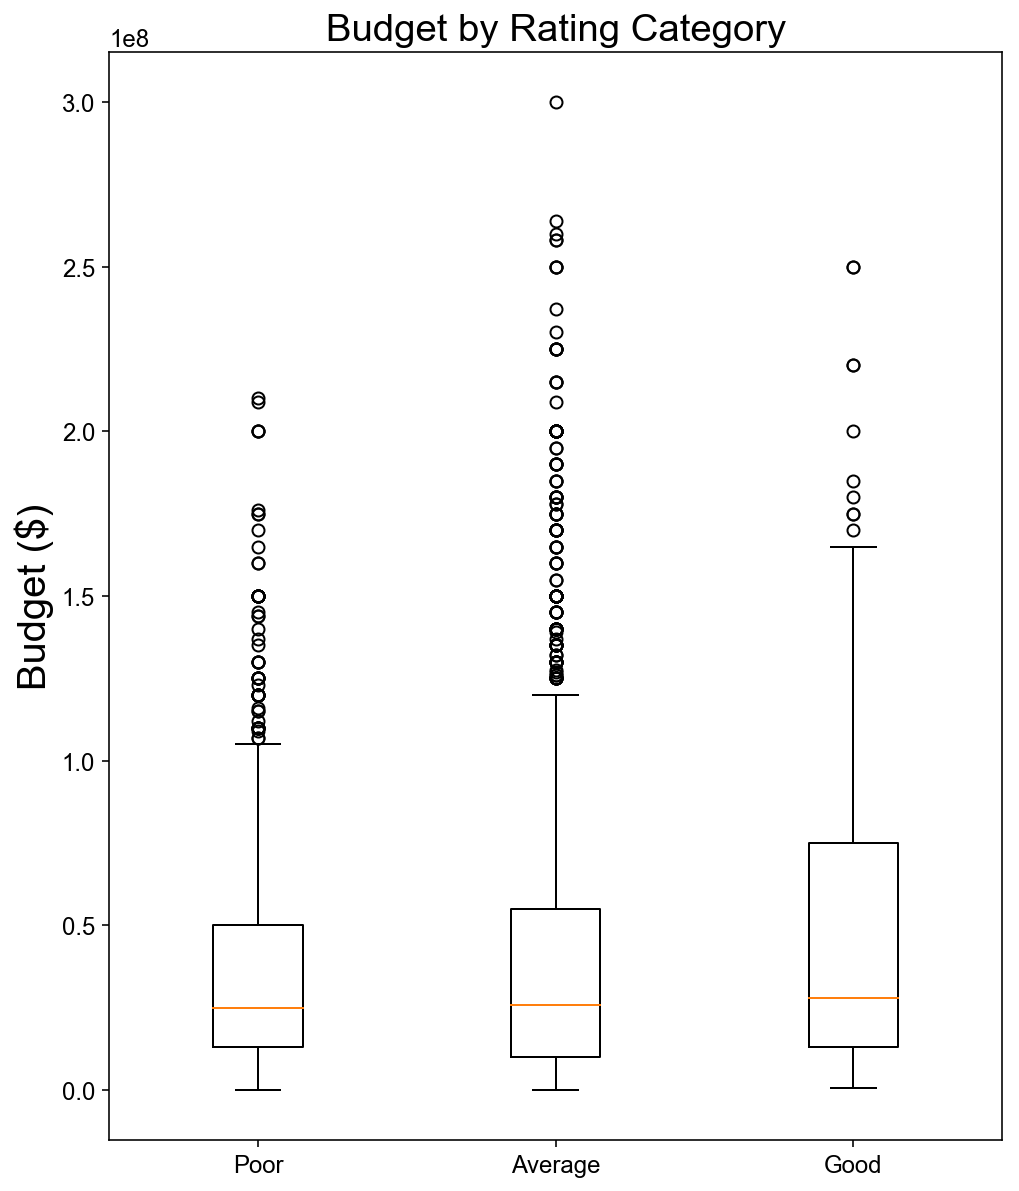

In [29]:
p = poor['budget'].tolist()
a = average['budget'].tolist()
g = good['budget'].tolist()

dataset = [p,a,g]

plt.figure(figsize=(8,10))
plt.boxplot(dataset, labels=['Poor','Average','Good'])
plt.title('Budget by Rating Category')
plt.ylabel('Budget ($)')
plt.show()

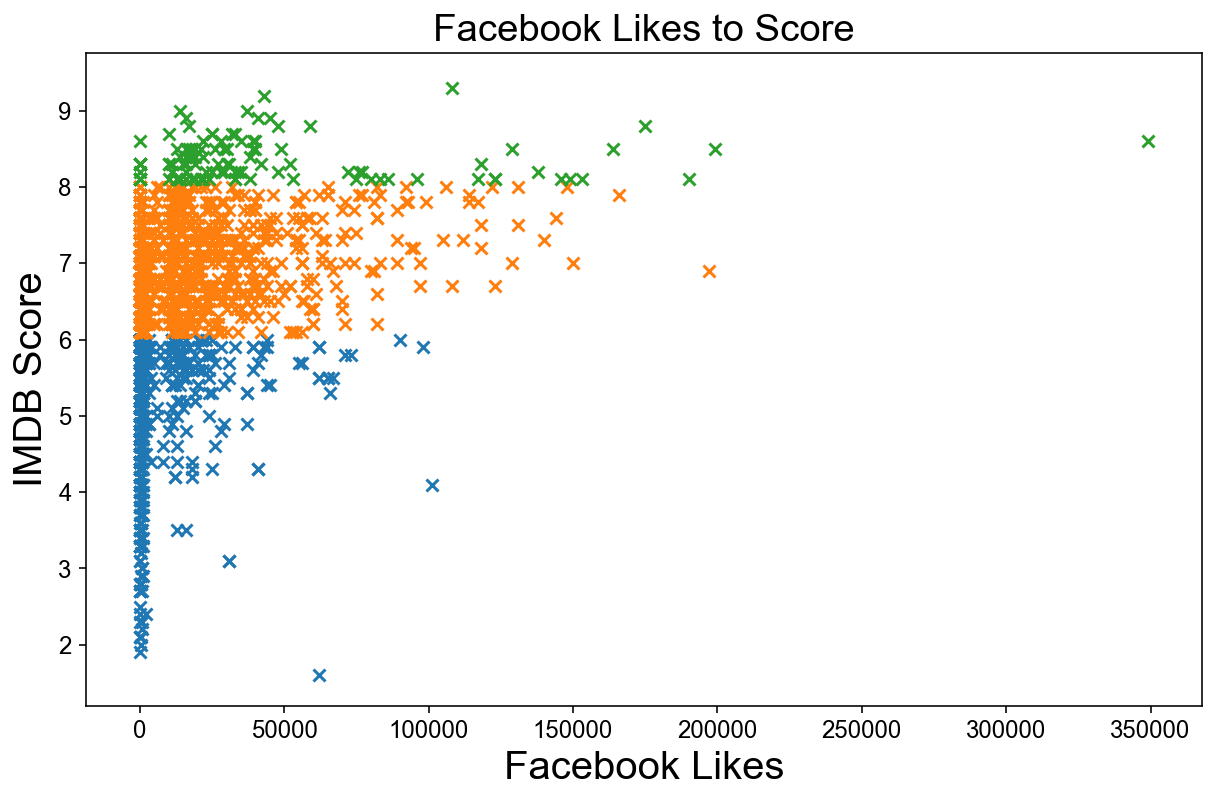

In [30]:
plt.scatter(poor['movie_facebook_likes'],poor['imdb_score'],marker='x',label='Poor')
plt.scatter(average['movie_facebook_likes'],average['imdb_score'],marker='x',label='Average')
plt.scatter(good['movie_facebook_likes'],good['imdb_score'],marker='x',label='Good')
plt.title('Facebook Likes to Score')
plt.xlabel('Facebook Likes')
plt.ylabel('IMDB Score')
plt.show()

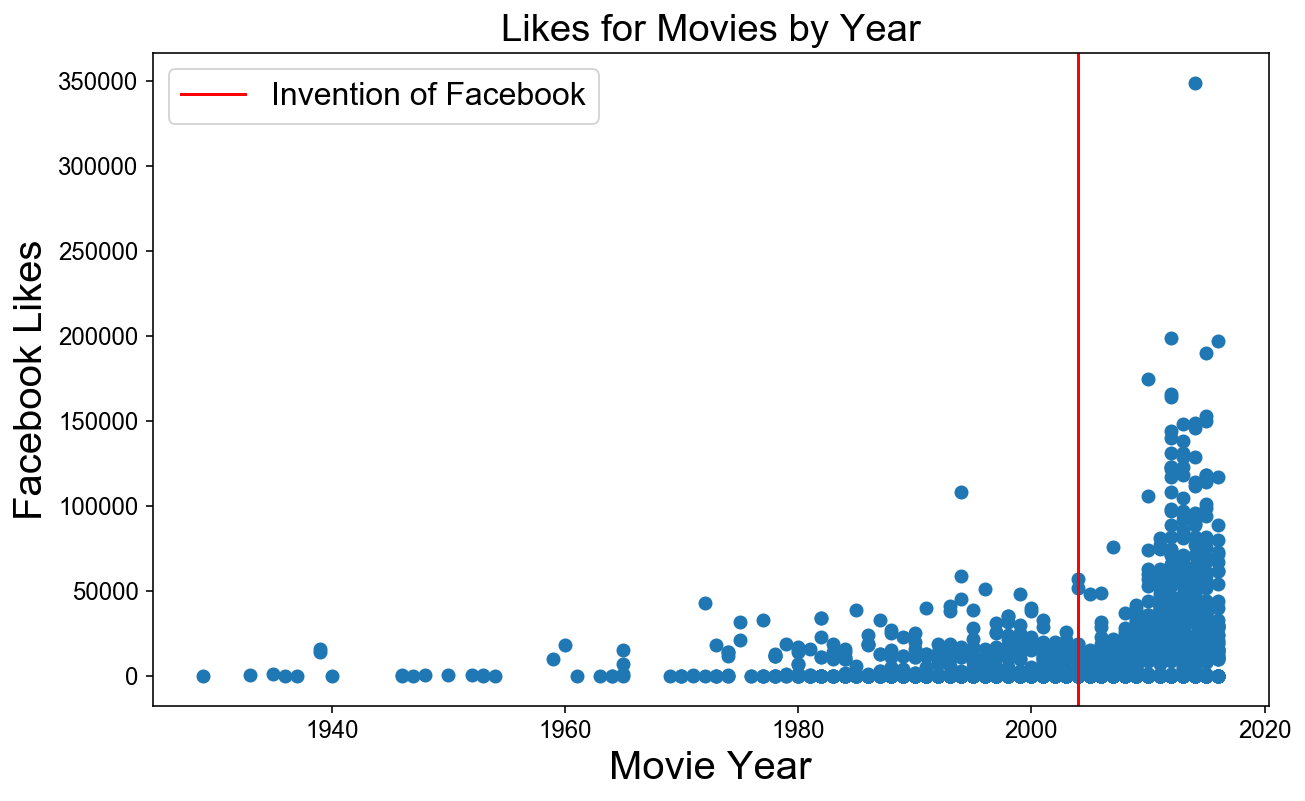

In [ ]:
plt.scatter(m['title_year'],m['movie_facebook_likes'])
plt.xlabel('Movie Year')
plt.ylabel('Facebook Likes')
plt.title('Likes for Movies by Year')
# plt.xscale('log')
fbLine = plt.axvline(x=2004,color='red')
plt.legend([fbLine], ['Invention of Facebook'])
plt.show()

In [ ]:
films_by_prolific={}
for name,score in m['director_name'].value_counts().iteritems():
    movies_by_director = m[m['director_name']==name]
    if score not in films_by_prolific:
        films_by_prolific[score] = movies_by_director.copy()
    else:
        films_by_prolific[score] = pd.concat([films_by_prolific[score], movies_by_director], ignore_index=True)

In [ ]:
prolific_directors[1]